# Imports and Setup

In [1]:
import sys
import os
sys.path.append(os.getenv("PYTHONPATH", ""))

from exploration import Exploration
from modeling import MMM
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
media_dt = pd.read_csv("/app/marketing_spend_and_revenue_data.csv")

The dataset used in MMMs typically consists of time-series data where each row represents a time unit, such as a day, week, or month. The columns contain information on various marketing and non-marketing variables. The dependent variable is usually a key performance indicator (KPI) such as revenue, sales, or conversions, which reflects the outcome the business wants to understand or optimize. The independent variables include media spend data for different channels like TV, digital ads, radio, and others, as well as conntext variables such as seasonality indicators, holidays, and macroeconomic factors.

In [ ]:
media_dt.head

In this example dataset (marketing_spend_and_revenue_data.csv), 'Google Performance Max', 'Google Search Brand', 'Google Search No Brand', 'Facebook Conversions', 'Facebook Others', 'Facebook Product Catalog Sales', 'Influencers', 'Display Ads', 'TV Ads', 'Radio Ads', and 'Magazine Ads' are media variables. It's row values are the total value spent in advertising through the respective channel for the given time unit represented by the period field (in this case, called 'Date').

'Covid' is a column representing a context variable, being 'true' for periods when covid what happening and 'false' otherwise. This variable in important as we're trying to bring some context that could explain how covid affected the target variable.

The dependent variable is 'Revenue', the total income generated by sales, which may have came to happen under the influence of any media channel.

# Exploration

Setting variable names from the dataset:

In [3]:
media_vars = [
    "Google Performance Max",
    "Google Search Brand",
    "Google Search No Brand",
    "Facebook Conversions",
    "Facebook Others",
    "Facebook Product Catalog Sales",
    "Influencers",
    "Display Ads",
    "TV Ads",
    "Radio Ads",
    "Magazine Ads"
]

context_vars = "Covid"

media_dt[context_vars] = media_dt[context_vars].astype(bool) #Cast the 'Covid' column from 'int64' to 'bool'

dependent_var = "Revenue"

date_field = "Date"

**<h4>Check multicollinearity</h4>**

Multicollinearity refers to a statistical phenomenon in which two or more independent variables in a regression model are highly correlated. This overlap in their patterns of variation  makes it hard for the regression model to isolate the unique effect of each variable on the dependent outcome, leading to unreliable and unstable estimates of the regression coefficients.

To address this issue, it is important to consider removing or combining highly correlated variables to eliminate redundancy. The following pairs of columns have a high rate of multicollinearity (above 65%):

In [4]:
modeling = Exploration(media_dt, media_vars, dependent_var)
modeling.check_multicollinearity()

Highly correlated variable pairs:

               Variable_1                      Variable_2  Correlation
0     Google Search Brand  Facebook Product Catalog Sales     0.694538
1     Google Search Brand                       Radio Ads     0.665907
2  Google Performance Max  Facebook Product Catalog Sales     0.660501
3  Google Performance Max                       Radio Ads     0.657258


**<h4>Correlation Analysis</h4>**

Correlation is a statiscal concept that measures the strength and direction of the relationship between two variables. It quantifies how closely the values of one variable move in relation to another. A positive correlation means both variables increase together, while a negative correlation means one increases as the other decreases. The correlation value ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship.

The following ...

In [76]:
#review - make the graph for every correlation?

In [5]:
modeling.check_correlation()

High Correlation Variables:
                         Variable  Correlation
0                       Radio Ads     0.821419
1  Facebook Product Catalog Sales     0.819146
2             Google Search Brand     0.815666
3          Google Performance Max     0.813555

Low Correlation Variables:
                  Variable  Correlation
4   Google Search No Brand     0.070942
5          Facebook Others     0.064756
6              Display Ads     0.019627
7              Influencers     0.014260
8             Magazine Ads    -0.018291
9                   TV Ads    -0.086229
10    Facebook Conversions    -0.086756


In [77]:
# Review - seasonality impact and time series

Spend per channel per week

In [109]:
best_alphas, best_betas, best_r2 = optimize_parameters()

In [111]:
print(best_alphas)
print(best_betas)
print(best_r2)

[9.54455231e-01 8.54249171e-01 9.07026852e-01 7.81599409e-01
 1.50922051e-08 1.35865127e+00 1.93524071e+00 3.15802231e-01
 1.29318821e+00 1.10018160e+00 5.25591082e-01]
[0.00000000e+00 0.00000000e+00 2.07201492e-07 9.70522807e-01
 2.13837251e-01 1.44982635e-01 2.97863674e-01 9.88949912e-01
 2.95411854e-01 1.43489934e-07 1.07441471e-01]
0.9060660614472288


Unoptimized variables regression:

In [122]:
y = media_dt[dependent_var]  # Dependent variable
X = media_dt[[f"{var}_dim_ret" for var in media_vars]]  # Transformed independent variables
X = sm.add_constant(X)  # Add intercept

# Fit the model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     95.77
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           7.95e-99
Time:                        22:47:21   Log-Likelihood:                -2917.1
No. Observations:                 365   AIC:                             5858.
Df Residuals:                     353   BIC:                             5905.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Optimized variables regression:

In [120]:
final_model = final_regression(media_dt, media_vars, dependent_var, best_alphas, best_betas)

print("Final Model Summary:")
print(final_model.summary())

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     309.5
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          8.57e-174
Time:                        22:44:04   Log-Likelihood:                -2737.7
No. Observations:                 365   AIC:                             5499.
Df Residuals:                     353   BIC:                             5546.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(media_dt["Time"], media_dt["sales"], label="Sales")
plt.plot(media_dt["Time"], media_dt["FB"], label="FB")
plt.plot(media_dt["Time"], media_dt["TV"], label="TV")
plt.plot(media_dt["Time"], media_dt["Radio"], label="Radio")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
media_dt["FB"].corr(media_dt["sales"])

np.float64(0.7980488795955992)

In [ ]:
plot_polynomial_function(media_dt["FB"], media_dt["sales"], 5)

# Dont know the name

Basic adstock model:

$A_{t} = \beta A_{t-1} + S_{t}, \quad t = 1,...,n$

Explain

Diminishing returns:

$dim\_ret(t) = (\beta A_{t-1} + S_{t})^{\alpha}, \quad t = 1,...,n$

Both $\alpha$ and $\beta$ are positive numbers between 0 and 1 and $A_{0}=S_{0}$

In [96]:
def calculate_and_plot_adstock(ind_var, beta, incremental=True):
    if not (0 <= beta <= 1):
        raise ValueError("Beta must be between 0 and 1.")

    adstock = np.zeros(len(ind_var))
    # adstock[0] = ind_var[0]**alpha
    adstock[0] = ind_var[0]

    for i in range(1, len(ind_var)):
        adstock[i] = ind_var[i] + beta*adstock[i - 1] if incremental else beta*adstock[i - 1]
        # adstock[i] = (ind_var[i] + beta*adstock[i - 1])**alpha

    plt.figure(figsize=(10, 5))
    if incremental:
        adstock.sort()
        ind_var = ind_var.sort_values()
        plt.plot(ind_var, adstock)
        plt.scatter(ind_var, adstock, label="Data Points", s=3)
    else:
        plt.plot(adstock)
    # plt.plot(ind_var, adstock, label="Adstock Decay Line", color="blue")
    # plt.xlabel("Time")
    # plt.ylabel("Value")
    plt.title(f"{'' if incremental else 'Non-'}Incremental Adstock Transformation")
    plt.legend()
    plt.grid(True)
    # plt.ylim(0,50)
    plt.tight_layout()
    plt.show()

In [98]:
def calculate_and_plot_dim_ret(ind_var, beta, alpha):
    if not (0 <= alpha <= 1):
        raise ValueError("Alpha must be between 0 and 1.")
    if not (0 <= beta <= 1):
        raise ValueError("Beta must be between 0 and 1.")

    adstock = np.zeros(len(ind_var))
    adstock[0] = ind_var[0]**alpha

    for i in range(1, len(ind_var)):
        adstock[i] = (ind_var[i] + beta*adstock[i - 1])**alpha

    plt.figure(figsize=(10, 5))
    adstock.sort()
    ind_var = ind_var.sort_values()
    plt.plot(ind_var, adstock)
    plt.scatter(ind_var, adstock, label="Data Points", s=3)

    # plt.plot(ind_var, adstock, label="Adstock Decay Line", color="blue")
    # plt.xlabel("Time")
    # plt.ylabel("Value")
    # plt.title(f"{'' if incremental else 'Non-'}Incremental Adstock Transformation")
    plt.title("Diminishing Returns Transformation")
    plt.legend()
    plt.grid(True)
    # plt.ylim(0,50)
    plt.tight_layout()
    plt.show()

In [ ]:
calculate_and_plot_adstock(media_dt["FB"], 0.5, False)

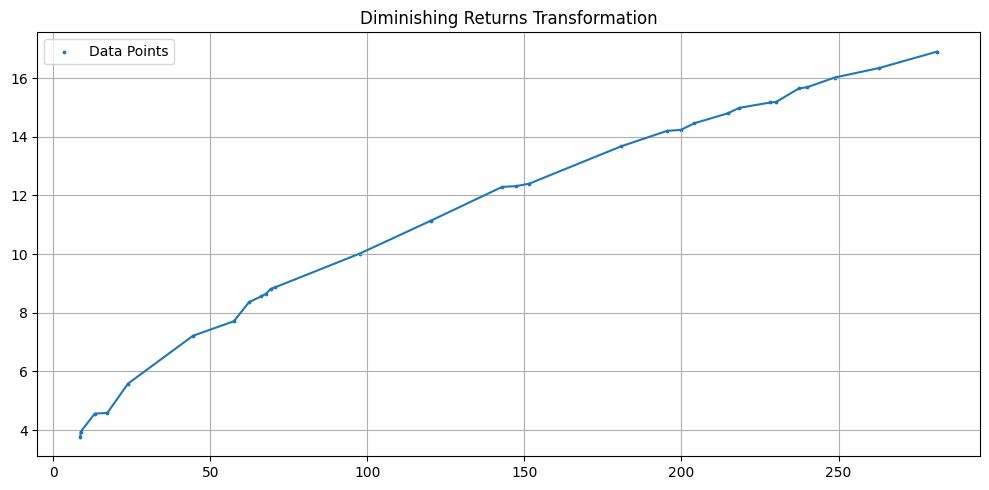

In [99]:
calculate_and_plot_dim_ret(media_dt["FB"], 0.5, 0.5)